In [1]:
from utils import *
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [ ]:
def fingerprint_pipeline(filename):
    # load the image and normalize
    img = np.array(cv.imread(f'./data/{filename}', 0))
    normalized = normalize_image(img)
    # segment and normalize the image
    masked, normalized_2, mask = segment_and_normalize(normalized, block_size=8, std_ratio=0.34) 

    # orientation estimation and rendering
    orient = estimate_orientation_map(normalized, 14)
    orient_render = render_orientation_lines(masked, mask, orient, 14)
    # ridge frequency estimation and Gabor filtering
    ridge_freq = ridge_frequency(normalized_2, mask, orient)
    gabor = gabor_filter(normalized_2, orient, ridge_freq)

    # skeletonization
    print("Skeletonization")
    skeleton_morph = morphological_skeleton(gabor)
    print("K3M Skeletonization")
    skeleton_k3m = k3m_skeleton(gabor, mask)
    # minutiae
    minutiae_morph, df_morph  = extract_minutiae(skeleton_morph)
    minutiae_k3m, df_k3m = extract_minutiae(skeleton_k3m)

    fig, axes = plt.subplots(2, 4, figsize=(10, 8))

    titles = ["Normalized", "Masked", "Orientation Map", "Gabor Filtered",
        "Morphological Skeleton", "K3M Skeleton", "Morphological Minutiae", "K3M Minutiae"]

    images = [normalized, masked, orient_render, gabor, 
        skeleton_morph, skeleton_k3m, minutiae_morph, minutiae_k3m]
    cmaps = ['gray'] * 8

    for ax, img, title, cmap in zip(axes.flat, images, titles, cmaps):
        ax.set_title(title)
        ax.imshow(img, cmap=cmap)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    return df_morph, df_k3m

In [3]:
def fingerprint_output(filename):
    img = np.array(cv.imread(f'./data/{filename}', 0))
    normalized = normalize_image(img)
    masked, normalized_2, mask = segment_and_normalize(normalized, block_size=8, std_ratio=0.34) 
    orient = estimate_orientation_map(normalized, 14)
    orient_render = render_orientation_lines(masked, mask, orient, 14)
    ridge_freq = ridge_frequency(normalized_2, mask, orient)
    gabor = gabor_filter(normalized_2, orient, ridge_freq)
    skeleton_k3m = k3m_skeleton(gabor, mask)
    minutiae_k3m, df_k3m = extract_minutiae(skeleton_k3m, draw_arrows=True)

    fig, axes = plt.subplots(1, 2, figsize=(6, 4))

    titles = ["Normalized", "K3M Minutiae"]
    images = [normalized, minutiae_k3m]
    cmaps = ['gray'] * 2

    for ax, img, title, cmap in zip(axes.flat, images, titles, cmaps):
        ax.set_title(title)
        ax.imshow(img, cmap=cmap)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    return df_k3m

1
2
Skeletonization
K3M Skeletonization
3
4


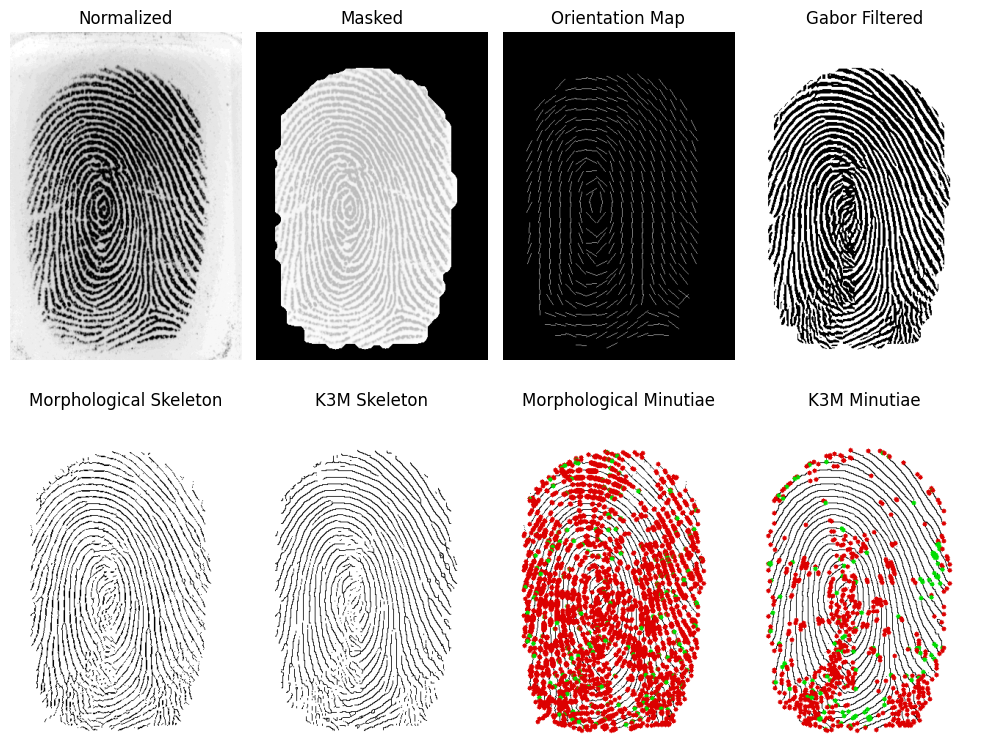

In [4]:
df_morph, df_k3m = fingerprint_pipeline('test.png')

In [5]:
df_morph

x    y         type angle
0     139   51       ending  None
1     142   52  bifurcation  None
2     163   52       ending  None
3     179   52       ending  None
4     142   53       ending  None
...   ...  ...          ...   ...
3921  118  431       ending  None
3922  150  431       ending  None
3923  151  431       ending  None
3924  107  432       ending  None
3925  147  432       ending  None

[3926 rows x 4 columns]

In [6]:
df_k3m

x    y         type angle
0    138   49       ending  None
1    162   50       ending  None
2    178   50       ending  None
3    182   52       ending  None
4    182   53  bifurcation  None
..   ...  ...          ...   ...
805  104  431       ending  None
806  112  431       ending  None
807  173  431       ending  None
808  106  432       ending  None
809  147  432       ending  None

[810 rows x 4 columns]

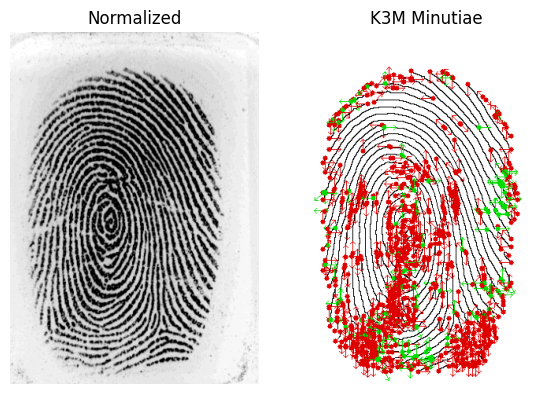

In [7]:
df_k3m = fingerprint_output('test.png')

In [8]:
df_k3m

x    y         type     angle
0    138   49       ending  1.570796
1    162   50       ending  1.570796
2    178   50       ending  1.570796
3    182   52       ending  2.356194
4    182   53  bifurcation  1.570796
..   ...  ...          ...       ...
805  104  431       ending -0.785398
806  112  431       ending -1.570796
807  173  431       ending -1.570796
808  106  432       ending -1.570796
809  147  432       ending  0.000000

[810 rows x 4 columns]

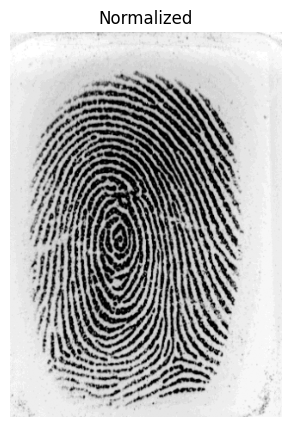

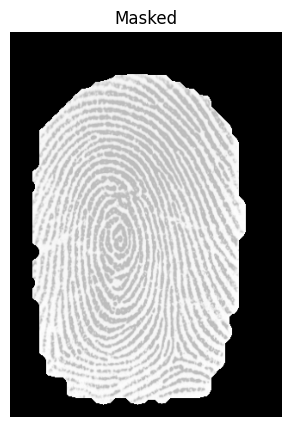

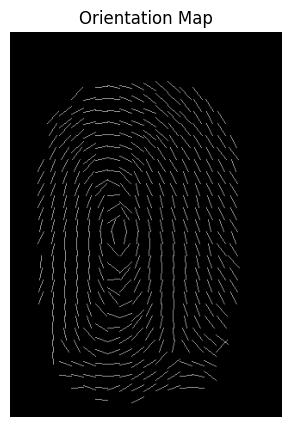

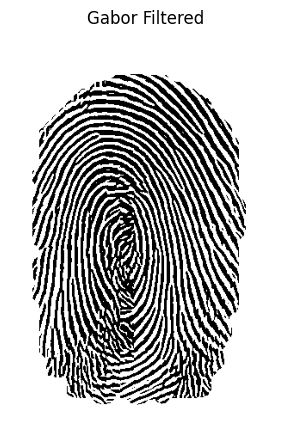

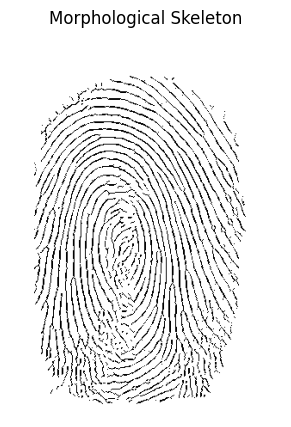

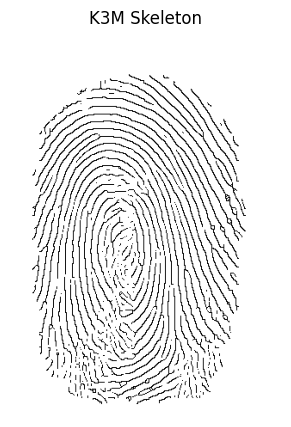

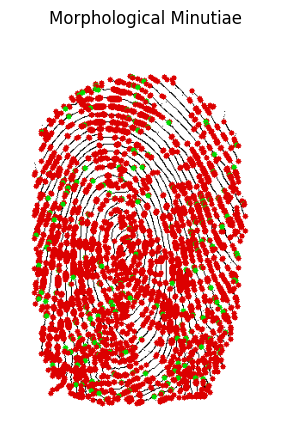

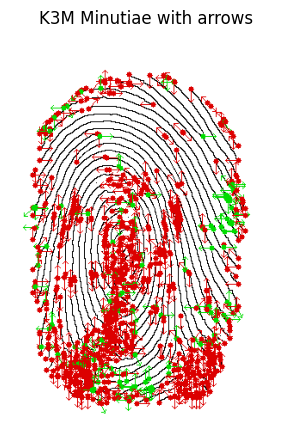

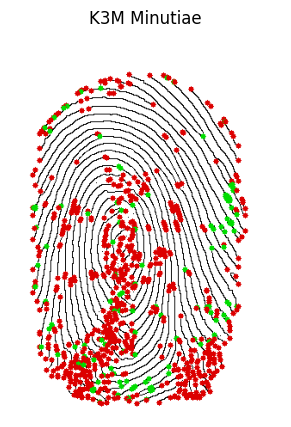

In [9]:
img = np.array(cv.imread(f'./data/test.png', 0))
normalized = normalize_image(img)
masked, normalized_2, mask = segment_and_normalize(normalized, block_size=8, std_ratio=0.34) 
orient = estimate_orientation_map(normalized, 14)
orient_render = render_orientation_lines(masked, mask, orient, 14)
ridge_freq = ridge_frequency(normalized_2, mask, orient)
gabor = gabor_filter(normalized_2, orient, ridge_freq)
skeleton_k3m = k3m_skeleton(gabor, mask)
minutiae_k3m_arr, df_k3m = extract_minutiae(skeleton_k3m, draw_arrows=True)
minutiae_k3m, df_k3m = extract_minutiae(skeleton_k3m, draw_arrows=False)
skeleton_morph = morphological_skeleton(gabor)
minutiae_morph, df_morph  = extract_minutiae(skeleton_morph)

image_list = [
    (normalized, "Normalized"),
    (masked, "Masked"),
    (orient_render, "Orientation Map"),
    (gabor, "Gabor Filtered"),
    (skeleton_morph, "Morphological Skeleton"),
    (skeleton_k3m, "K3M Skeleton"),
    (minutiae_morph, "Morphological Minutiae"),
    (minutiae_k3m_arr, "K3M Minutiae with arrows"),
    (minutiae_k3m, "K3M Minutiae")
]

for img, title in image_list:
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()


1
2
Skeletonization
K3M Skeletonization
3
4


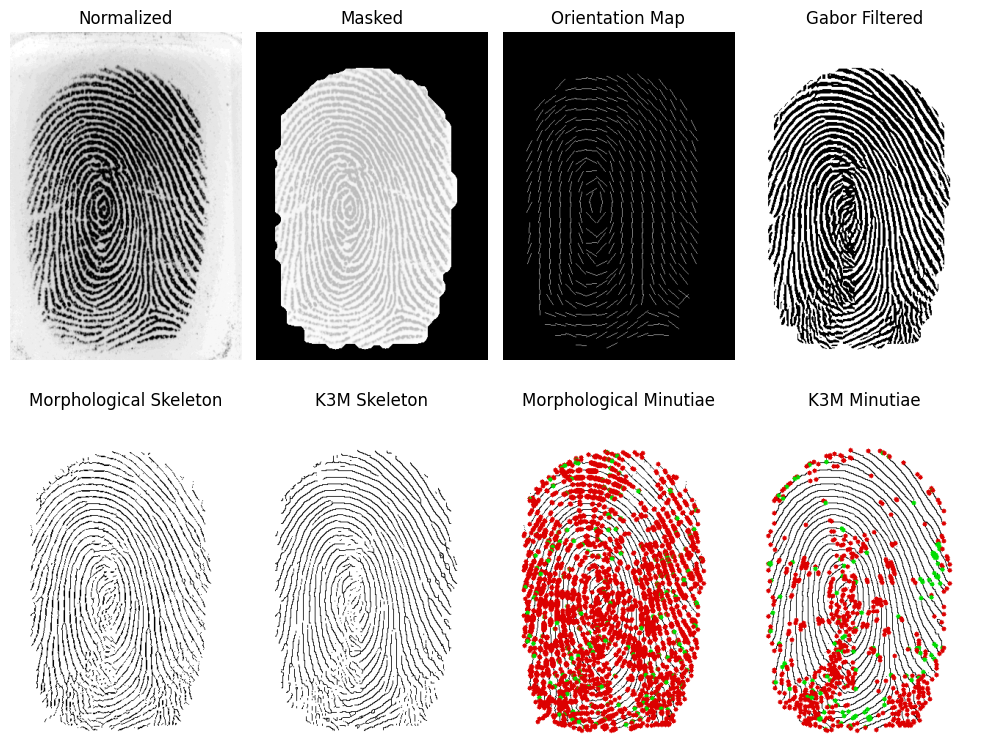

(        x    y         type angle
 0     139   51       ending  None
 1     142   52  bifurcation  None
 2     163   52       ending  None
 3     179   52       ending  None
 4     142   53       ending  None
 ...   ...  ...          ...   ...
 3921  118  431       ending  None
 3922  150  431       ending  None
 3923  151  431       ending  None
 3924  107  432       ending  None
 3925  147  432       ending  None
 
 [3926 rows x 4 columns],
        x    y         type angle
 0    138   49       ending  None
 1    162   50       ending  None
 2    178   50       ending  None
 3    182   52       ending  None
 4    182   53  bifurcation  None
 ..   ...  ...          ...   ...
 805  104  431       ending  None
 806  112  431       ending  None
 807  173  431       ending  None
 808  106  432       ending  None
 809  147  432       ending  None
 
 [810 rows x 4 columns])

In [11]:
fingerprint_pipeline('test.png')

Processing l11.bmp...
1
2
Skeletonization
K3M Skeletonization
3
4


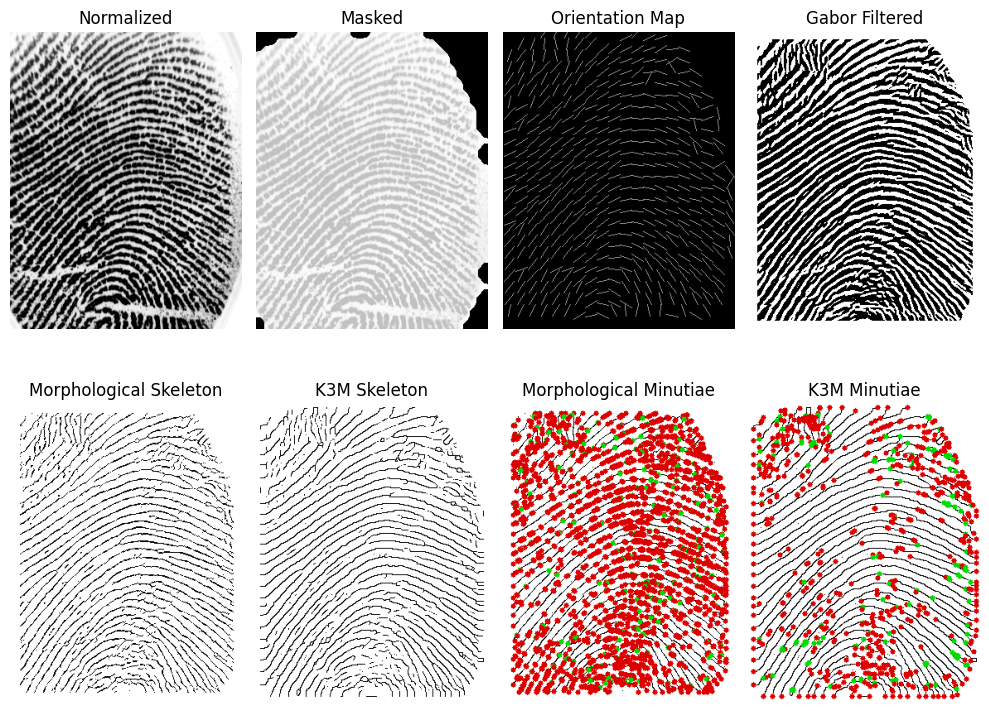

Processing l12.bmp...
1
2
Skeletonization
K3M Skeletonization
3
4


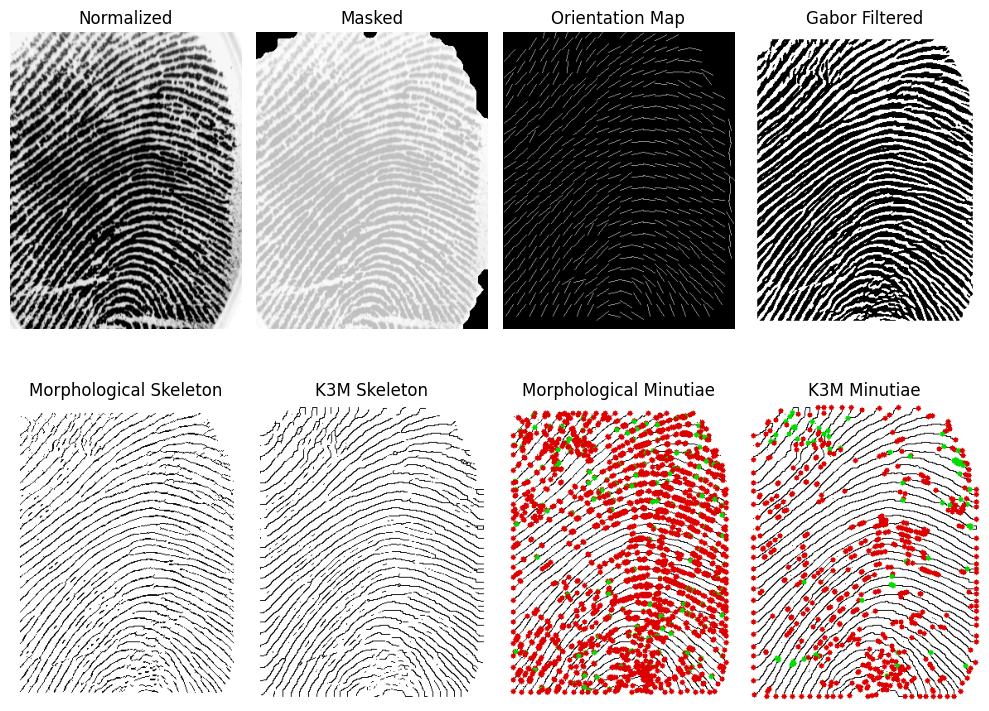

Processing l13.bmp...
1
2
Skeletonization
K3M Skeletonization
3
4


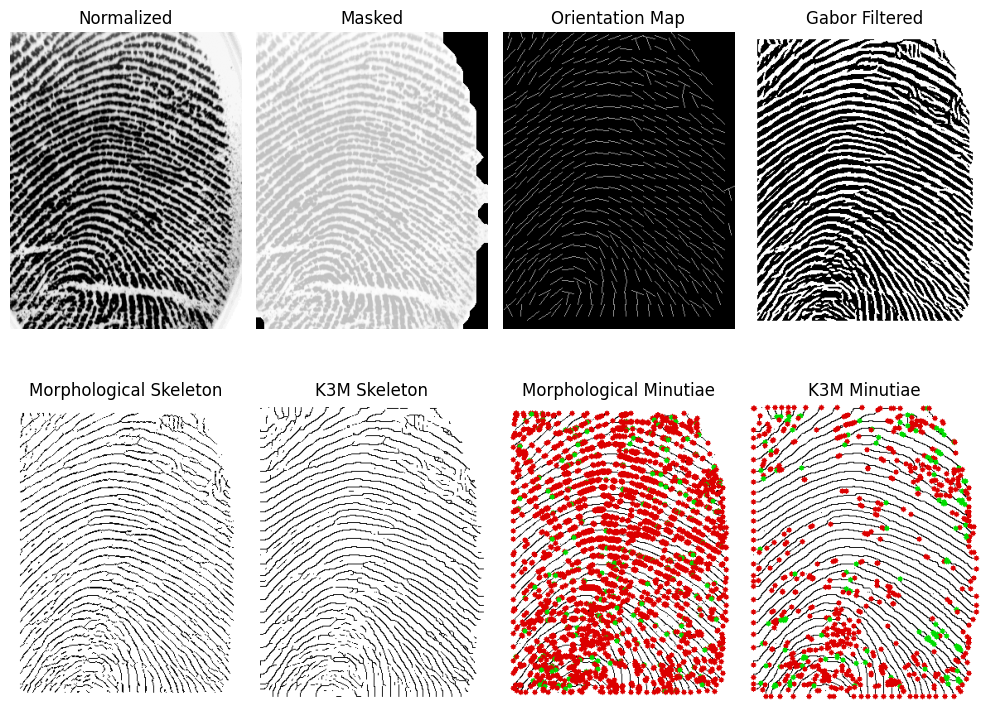

Processing l14.bmp...
1
2
Skeletonization
K3M Skeletonization
3
4


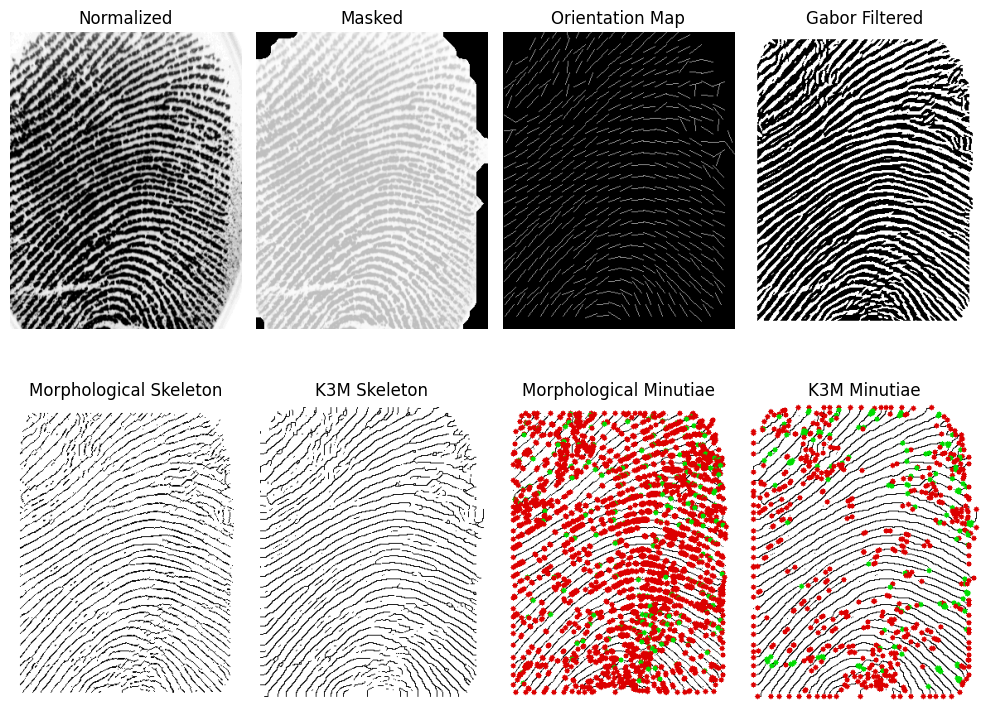

Processing l15.bmp...
1
2
Skeletonization
K3M Skeletonization
3
4


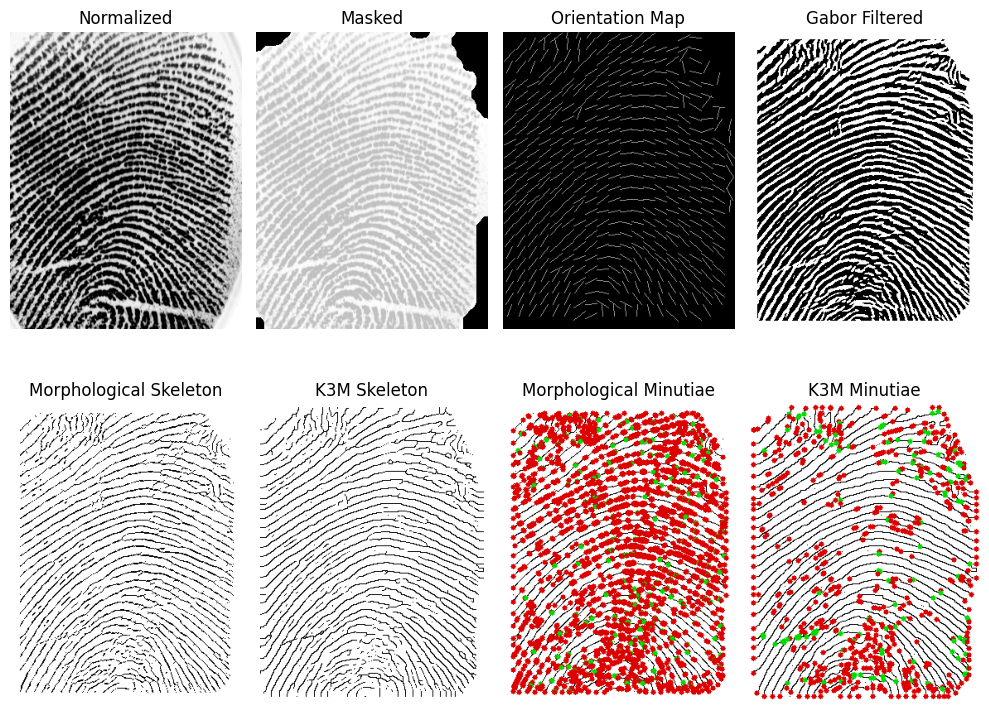

In [10]:
for filename in ['l11.bmp', 'l12.bmp', 'l13.bmp', 'l14.bmp', 'l15.bmp']:
    print(f"Processing {filename}...")
    df_morph, df_k3m = fingerprint_pipeline(filename)
